### ASSIGNMENT 1

### N SAI DHANUSH

### CB.EN.P2DSC21016

### QUESTION 1

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from tqdm import tqdm 
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import keras
from keras.applications.vgg16 import VGG16 
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model 
from keras.initializers import he_normal
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [2]:
from skimage import io
import numpy as np

In [3]:
image = np.random.randint(0, 10, (3, 5, 5))
N = 2 # Number of Filters
kernel = np.random.randint(0, 2, (N, 3, 3, 3))

In [4]:
def convolve2D(a, b, p=0, s=1):
    # a --> Input
    # b --> Kernel
    # p --> Padding
    # s --> Stride

    # sizes of Input & Kernel
    a_size = np.shape(a)
    b_size = np.shape(b)

    # initialization of output
    c_size = (int(1 + (a_size[0] - b_size[0] + 2 * p) / s), int(1 + (a_size[1] - b_size[1] + 2 * p) / s))
    c = np.zeros(c_size)

    # Padding
    if p != 0:
        padded_image_size = (a_size[0] + p * 2, a_size[1] + p * 2)
        padded_image = np.zeros(padded_image_size)

        padded_image[p: -1 * p, p: -1 * p] = a
    else:
        padded_image = a

    # Iterate through image
    for y in range(a_size[1]):
        # Exit Convolution
        if y > a_size[1] - b_size[1]:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % s == 0:
            for x in range(a_size[0]):
                # Go to next row once kernel is out of bounds
                if x > a_size[0] - b_size[0]:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % s == 0:
                        c[x, y] = (b * padded_image[x: x + b_size[0], y: y + b_size[1]]).sum()
                except:
                    break
    return padded_image


In [5]:
def convolution_layer(a, b):
    # n --> no of filters

    a_size = np.shape(a) # Shape of image
    b_size = np.shape(b) # Shape of filter

    c_size = (b_size[0], a_size[2] - b_size[3] + 1, a_size[1] - b_size[2] + 1) # Shape of Fetaure map
    c = np.zeros(c_size, dtype=int)

    for k in range(b_size[0]):
        for i in range(c_size[2]):
            for j in range(c_size[1]):
                c[k, i, j] = convolve2D(a[0, i:i + len(b), j:j + len(b)], b[k][0])[0][0] + \
                             convolve2D(a[1, i:i + len(b), j:j + len(b)], b[k][1])[0][0] + \
                             convolve2D(a[2, i:i + len(b), j:j + len(b)], b[k][2])[0][0]

    return c

In [6]:
feature_map = convolution_layer(image,kernel)

print(f" Feature Map \n {feature_map}")
print(f" Size of Feature Map is {np.shape(feature_map)}")

 Feature Map 
 [[[12 14 15]
  [ 4 15 15]
  [14 16 21]]

 [[12 14 15]
  [ 4 15 15]
  [14 16 21]]]
 Size of Feature Map is (2, 3, 3)


### QUESTION 2

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
from tqdm import tqdm 
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import keras
from keras.applications.vgg16 import VGG16 
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model 
from keras.applications import DenseNet201
from keras.initializers import he_normal
from keras.layers import Lambda, SeparableConv2D, BatchNormalization, Dropout, MaxPooling2D, Input, Dense, Conv2D, Activation, Flatten 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [8]:
class_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
nb_classes = len(class_names)
image_size = (150,150)

In [9]:
def load_data():

    datasets = ['C:/Users/Welcome/Desktop/dataset2-master/images/TRAIN','C:/Users/Welcome/Desktop/dataset2-master/images/TEST' ]
    images = []
    labels = []

    # iterate through training and test sets
    for dataset in datasets:

        # iterate through folders in each dataset
        for folder in os.listdir(dataset):

            if folder in ['EOSINOPHIL']: label = 0
            elif folder in ['LYMPHOCYTE']: label = 1
            elif folder in ['MONOCYTE']: label = 2
            elif folder in ['NEUTROPHIL']: label = 3

            # iterate through each image in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # get pathname of each image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the| img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    return images, labels

In [10]:
images, labels = load_data()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 624/624 [00:01<00:00, 380.25it/s]


In [11]:
images, labels = shuffle(images, labels, random_state=10)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2)
test_images, val_images, test_labels, val_labels = train_test_split(test_images, test_labels, test_size = 0.5)

In [12]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))
# shape of trianing images & labels
print("Shape of Training Exaples: {}".format(train_images.shape))
print("Shape of Training Labels: {}".format(train_labels.shape))
#shape of validation images & labels
print("Shape of Validation Images: {}".format(val_images.shape))
print("Shape of Validatio Labels: {}".format(val_labels.shape))
#shape of test images & labels
print("Shape of Test Images: {}".format(test_images.shape))
print("Shape of Test Labels: {}".format(test_labels.shape))

Number of training examples: 9955
Number of validation examples: 1245
Number of testing examples: 1244
Shape of Training Exaples: (9955, 150, 150, 3)
Shape of Training Labels: (9955,)
Shape of Validation Images: (1245, 150, 150, 3)
Shape of Validatio Labels: (1245,)
Shape of Test Images: (1244, 150, 150, 3)
Shape of Test Labels: (1244,)


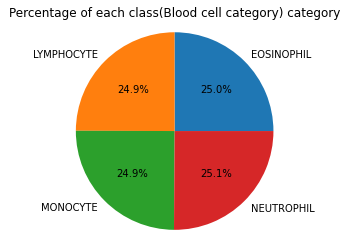

In [13]:
_, train_counts = np.unique(train_labels, return_counts = True)
_, val_counts = np.unique(val_labels, return_counts = True)
_, test_counts = np.unique(test_labels, return_counts = True)

plt.pie(train_counts,explode=(0, 0, 0, 0) , labels=class_names,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of each class(Blood cell category) category')
plt.show()

In [14]:
#Normalising data
train_images = train_images / 255.0 
val_images = val_images / 255.0
test_images = test_images / 255.0

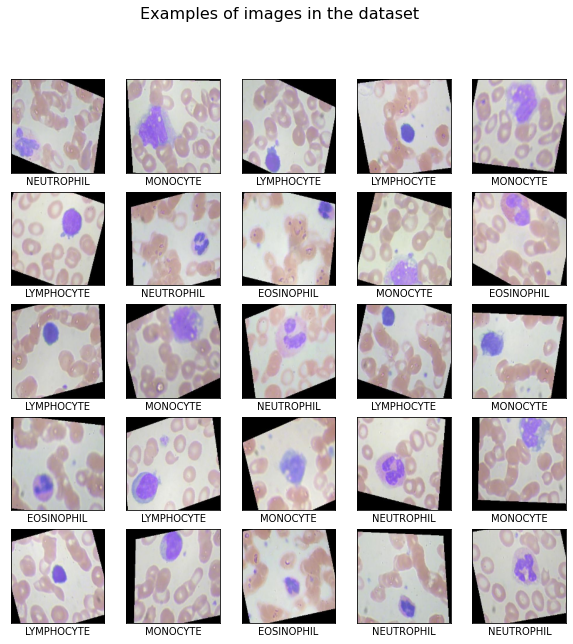

In [15]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle("Examples of images in the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
    
display_examples(class_names, train_images, train_labels)

### CUSTOM CNN ARCHITECTURE


In [16]:
model1 = Sequential()

# First Conv block
model1.add(Conv2D(16 , (3,3) , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
model1.add(Conv2D(16 , (3,3), padding = 'same' , activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

# Second Conv block
model1.add(SeparableConv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))

# Third Conv block
model1.add(SeparableConv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))

# Forth Conv block
model1.add(SeparableConv2D(128, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(128, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))

# Fifth Conv block 
model1.add(SeparableConv2D(256, (3,3), activation = 'relu', padding = 'same'))
model1.add(SeparableConv2D(256, (3,3), activation = 'relu', padding = 'same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.2))

# FC layer 
model1.add(Flatten())
model1.add(Dense(units = 512 , activation = 'relu'))
model1.add(Dropout(0.7))
model1.add(Dense(units = 128 , activation = 'relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units = 64 , activation = 'relu'))
model1.add(Dropout(0.3))

# Output layer
model1.add(Dense(units = 4 , activation = 'softmax'))

# Compile
model1.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model1.summary()

# Implement callbacks 
checkpoint = ModelCheckpoint(filepath='best_model.hdf5', save_best_only=True, save_weights_only=False)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, verbose = 1, mode='min', restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_accuracy', 
    patience = 2, 
    verbose = 1, 
    factor = 0.3, 
    min_lr = 0.0001)

# Train
history1 = model1.fit(
    train_images, 
    train_labels, 
    batch_size = 32, 
    epochs = 25, 
    validation_data=(val_images, val_labels), 
    callbacks=[learning_rate_reduction])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 75, 75, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 75, 75, 32)       1344      
 leConv2D)                                                       
                                                        

In [17]:
def plot_accuracy_loss_chart(history):
    epochs = [i for i in range(10)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(20,10)
    ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
    ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
    ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")
    plt.show()

### Accuracy plot

ValueError: x and y must have same first dimension, but have shapes (10,) and (25,)

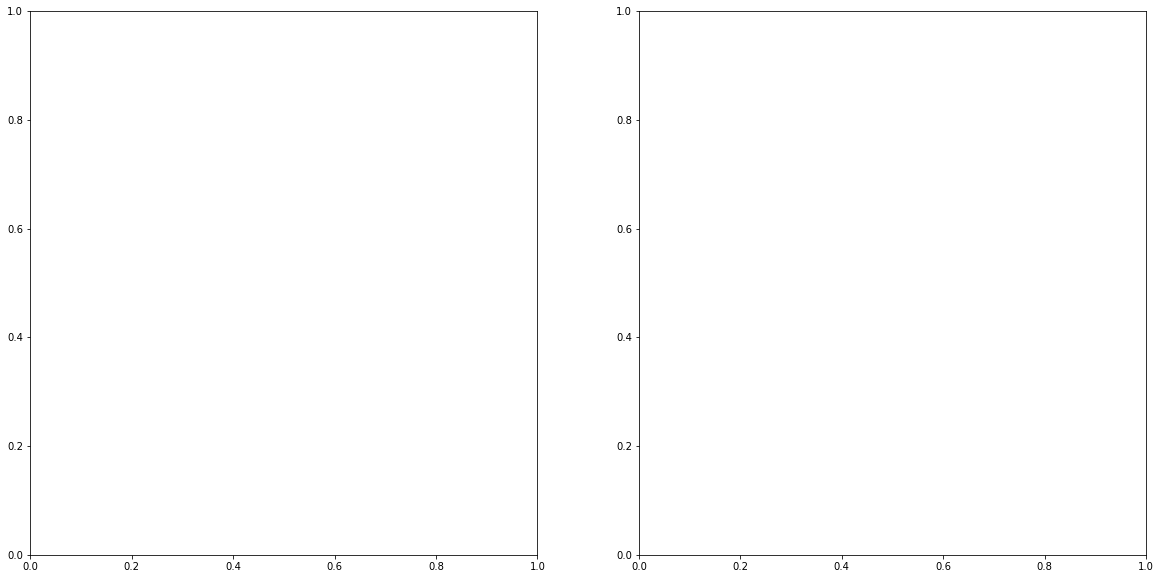

In [18]:
plot_accuracy_loss_chart(history1)

### TEST ACCURACY

In [19]:
results = model1.evaluate(test_images, test_labels)

print("Loss of the model is - ", results[0])
print("Accuracy of the model is - ", results[1]*100, "%")

39/39 [==============================] - 10s 251ms/step - loss: 0.4930 - accuracy: 0.8432
Loss of the model is -  0.4929571747779846
Accuracy of the model is -  84.32475924491882 %


In [20]:
from sklearn.metrics import classification_report

predictions = model1.predict(test_images)
predictions = np.argmax(predictions,axis=1)
predictions[:15]

39/39 [==============================] - 10s 248ms/step


array([0, 2, 0, 0, 0, 2, 3, 1, 2, 0, 0, 2, 1, 3, 1], dtype=int64)

### CLASSIFICATION REPORT

In [21]:
print(classification_report(
    test_labels, 
    predictions, 
    target_names = ['EOSINOPHIL (Class 0)', 'LYMPHOCYTE (Class 1)', 'MONOCYTE (Class 2)', 'NEUTROPHIL (Class 3)']))

                      precision    recall  f1-score   support

EOSINOPHIL (Class 0)       0.67      0.94      0.78       323
LYMPHOCYTE (Class 1)       0.92      1.00      0.96       308
  MONOCYTE (Class 2)       1.00      0.87      0.93       297
NEUTROPHIL (Class 3)       0.92      0.56      0.70       316

            accuracy                           0.84      1244
           macro avg       0.88      0.84      0.84      1244
        weighted avg       0.87      0.84      0.84      1244



In [22]:
cm = confusion_matrix(test_labels, predictions)
cm = pd.DataFrame(cm, index = ['0', '1', '2', '3'], columns = ['0', '1', '2', '3'])
cm

,0,1,2,3
0,305,3,0,15
1,0,308,0,0
2,17,21,259,0
3,136,2,1,177


### CONFUSION MATRIX

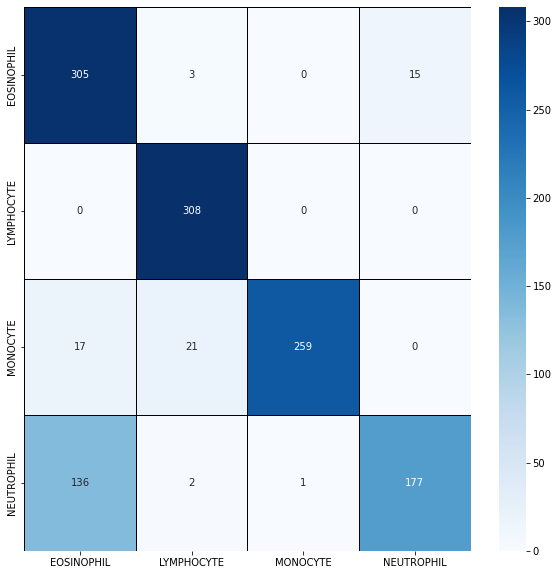

In [23]:
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)